In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path
import audiofile

datadir = r"C:/Users/delbe/Music/"

In [2]:
def read_haishin(filename, datadir=datadir) -> tuple[np.ndarray, int]:
    return audiofile.read(datadir + filename + ".m4a")

data, rate = read_haishin("【記念雑談】5万人感謝！と過去エピ総編集【LVG _ 一ノ瀬うるは】 [xivNxCSvXVM]")

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [50]:
plt.style.use('default')
m = data[:, :rate*20]

In [44]:
inds = np.nonzero(np.abs(m) < 0.02)[1]

def get_consecutive_groups(inds: np.ndarray, threshold: float) -> tuple[list[list], list[int]]:
    """
    ```python
    >>> groups[:5]
    [[12, 13, 14, 15], [28, 29], [41, 42], [52, 53, 54], [56, 57, 58]]

    >>> ungrouped[:5]
    [6, 17, 23, 47, 66]
    ```
    """
    isConsec = (inds[1:] - inds[:-1]) <= threshold

    groups: list[list[int]] = []
    ungrouped: list[int] = []
    current_group: list[int] = []

    for i, ind in enumerate(inds[:-1]):
        if isConsec[i]:
            current_group.append(ind)
            continue
        if isConsec[i-1]:
            current_group.append(ind)
            groups.append(current_group)
            current_group = []
            continue

        ungrouped.append(ind)
        continue

    if isConsec[-1]:
        groups[-1].append(inds[-1])
    else:
        ungrouped.append(inds[-1])

    return groups, ungrouped

(-0.05, 0.05)

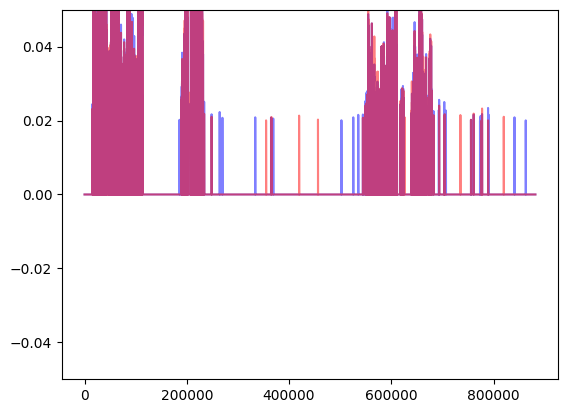

In [45]:
ind_a = inds[0]

plt.plot(m[0,:], c='b', alpha=0.5)
plt.plot(m[1,:], c='r', alpha=0.5)

plt.ylim([-0.05, 0.05])

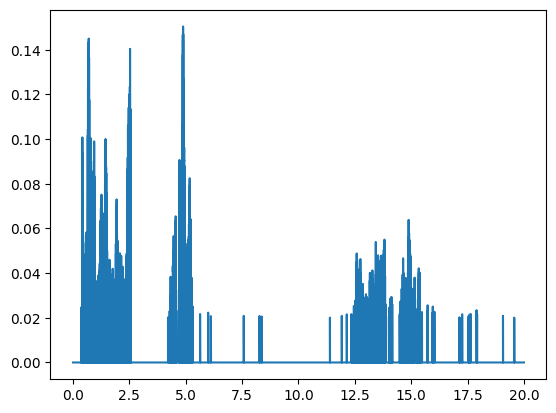

In [52]:
# plt.plot(np.where((-0.02 < m) < 0.02, m, 0))

mask = np.abs(m) < 0.001
m[mask] = 0 
plt.plot(np.arange(0, rate*20)/rate, m[0, :])